    
# Problem Statement


A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 




**Business Goal:**
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Import Libraries

In [95]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

##  Step 1: Read data Validate data quality 


In [96]:
bikesharing = pd.read_csv("day.csv")
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Task 1 - Inspect the housing dataframe
1. **Check data Quality**
2. **Treating null values**

In [97]:
bikesharing.shape

(730, 16)

In [98]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [99]:
bikesharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [100]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [101]:
#Identify columns with more null values
bikesharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [102]:
bikesharing["dteday"].describe()

count            730
unique           730
top       01-01-2018
freq               1
Name: dteday, dtype: object

## Task 1 : Visualization of numeric fields 

<Figure size 1800x1440 with 0 Axes>

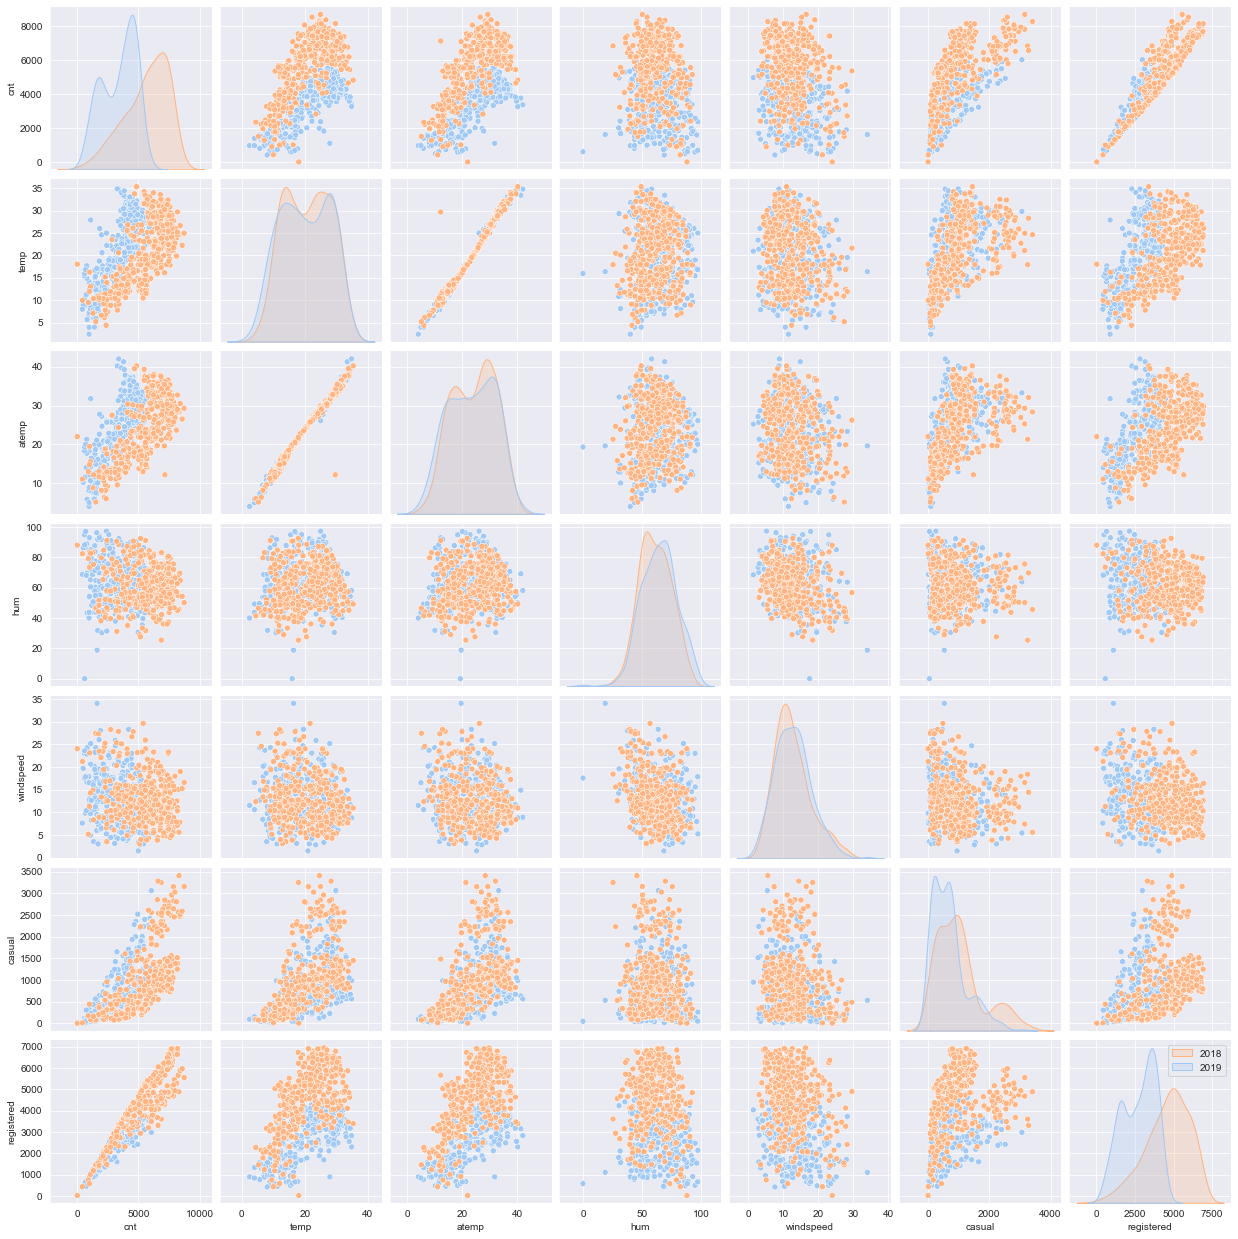

In [103]:
#Visualize numeric variables and check data

viscols =['cnt','temp','atemp','hum','windspeed','casual','registered']
plt.figure(figsize = (25,20))
plt.suptitle("Bike sharing pairplot")
sns.set_style('darkgrid')
xp = sns.pairplot(data=bikesharing,palette='pastel',vars=viscols,hue='yr')
xp._legend.remove()
plt.legend(labels=['2018', '2019'])
# yr : year (0: 2018, 1:2019)
plt.show()



### Task 2 : Create HeatMap for Correlation

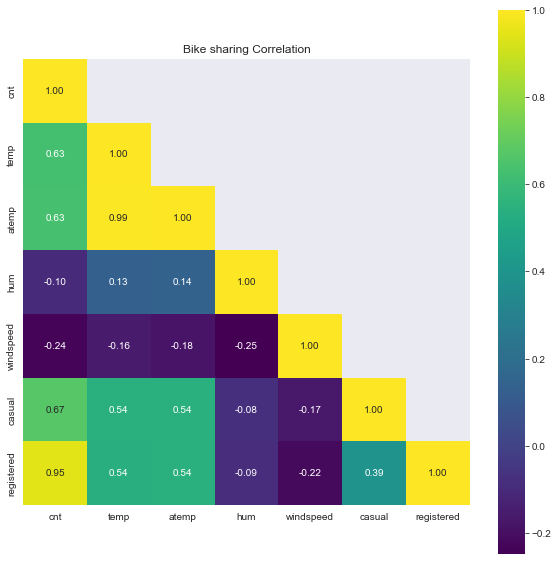

In [104]:
plt.figure(figsize=(10,10))
plt.title('Bike sharing Correlation')
corr= bikesharing[viscols].corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr, mask=mask,cmap = "viridis",square=True,annot=True,fmt=".2f")
plt.show()

In [105]:
# Top 5 highly correalted numeric variables
round(corr,2).unstack().sort_values(ascending=False).drop_duplicates().head(5)

cnt         cnt     1.00
atemp       temp    0.99
registered  cnt     0.95
casual      cnt     0.67
cnt         temp    0.63
dtype: float64

### Task 3 : Visualising Categorical Variables

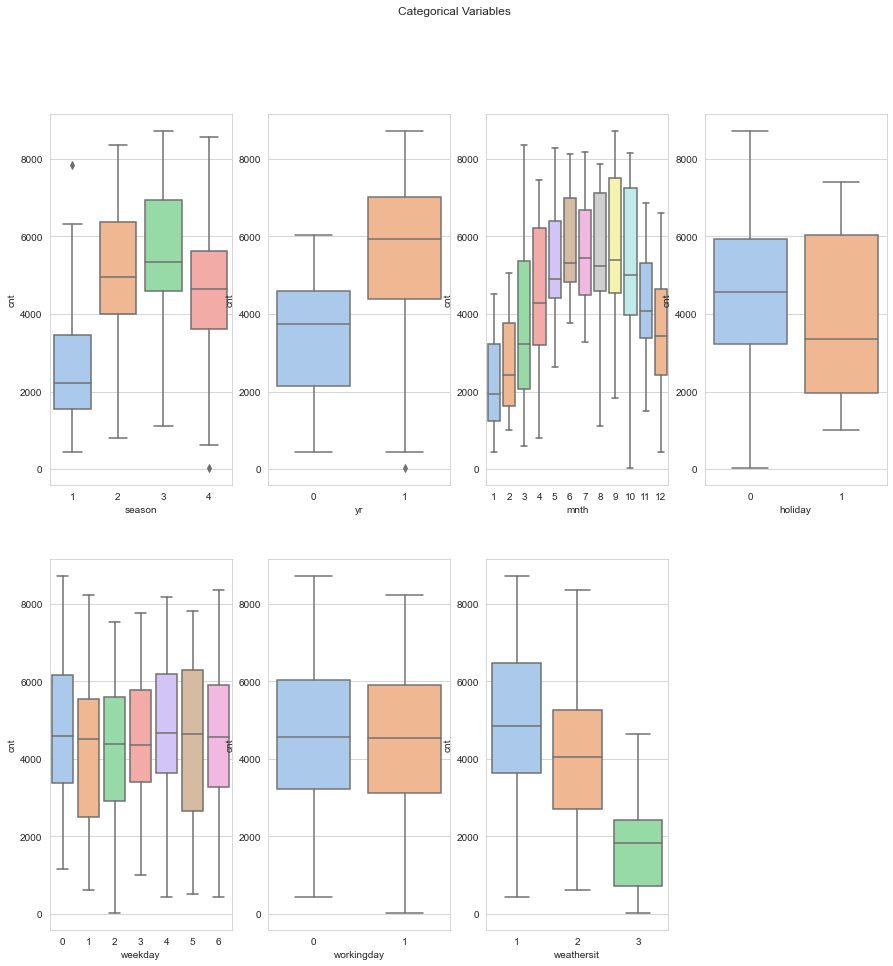

In [106]:
plt.figure(figsize=(15, 15))
sns.set_style('whitegrid')
plt.suptitle("Categorical Variables")
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing,palette='pastel')
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing,palette='pastel')
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing,palette='pastel')
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing,palette='pastel')
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing,palette='pastel')
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing,palette='pastel')
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing,palette='pastel')
plt.show()

As per the data total number of bike rental increased in 2019. 

## Data Preparation
### Task 1 :  categotical column to specific fields

   1. season : season (1:spring, 2:summer, 3:fall, 4:winter)
   2. yr : year (0: 2018, 1:2019)
   3. mnth : month ( 1 to 12)
   4. holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
   5. weekday : day of the week [0 :"Sunday", 1 : "Monday", 2 : "Tuesday", 3 : "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday]
   6. workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
   7. weathersit : 
		- a: Clear, Few clouds, Partly cloudy, Partly cloudy
		- b: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- c: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- d: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [107]:
bikeval = bikesharing

In [108]:
# Convert season column

bikeval['season'] = bikeval['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [109]:
bikeval.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [110]:
bikeval['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [111]:
#Convert mnth column

bikeval['mnth'] = bikeval['mnth'].apply(lambda x:datetime.date(1900, x , 1).strftime('%b'))

In [112]:
bikeval.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [113]:
bikeval['mnth'].value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [114]:
#Check field holiday

In [115]:
bikeval['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [116]:
#Convert column weekday to corresponsing days 

bikeval['weekday'] = bikeval['weekday'].map({0 : "Sunday", 1 : "Monday", 2 : "Tuesday", 3 : "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"})


In [117]:
bikeval.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Monday,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tuesday,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [118]:
#Check column workingday 
bikeval["workingday"].value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [119]:
#Check column weathersit  
 
bikeval['weathersit'] = bikeval['weathersit'].map({1 : "Clear", 2 : "Mist and Cloudy", 3 : "Light Snow", 4 : "Heavy Rain"})

In [120]:
bikeval.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Monday,1,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tuesday,1,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [121]:
bikeval["weathersit"].value_counts()

Clear              463
Mist and Cloudy    246
Light Snow          21
Name: weathersit, dtype: int64

In [122]:
#Converting bikeval to datetime
bikeval['dteday'] = pd.to_datetime(bikeval['dteday'])

In [123]:
bikeval['day'] = bikeval['dteday'].dt.day

In [124]:
bikeval.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2018-01-01,spring,0,Jan,0,Monday,1,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,2018-02-01,spring,0,Jan,0,Tuesday,1,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,2018-03-01,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1
3,4,2018-04-01,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1
4,5,2018-05-01,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1


In [125]:
bikeval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
 16  day         730 non-null  

###  Task 2 :  Creating dummy variables
create dummy columns for below categorical columns
1. season 
2. mnth 
3. weekday 
4. weathersit 

In [126]:
# Creating Dummy varibles
dummycol = pd.get_dummies(bikeval[['season','mnth','weekday','weathersit']], drop_first = True)
#Add dummy column to original entry
bikeval = pd.concat([bikeval, dummycol], axis = 1)  


In [127]:
bikeval.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist and Cloudy
0,1,2018-01-01,spring,0,Jan,0,Monday,1,Mist and Cloudy,14.110847,...,0,0,1,0,0,0,0,0,0,1
1,2,2018-02-01,spring,0,Jan,0,Tuesday,1,Mist and Cloudy,14.902598,...,0,0,0,0,0,0,1,0,0,1
2,3,2018-03-01,spring,0,Jan,0,Wednesday,1,Clear,8.050924,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,spring,0,Jan,0,Thursday,1,Clear,8.200000,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,spring,0,Jan,0,Friday,1,Clear,9.305237,...,0,0,0,0,0,0,0,0,0,0


In [128]:
# drop the columns which is already added as dummy

bikeval = bikeval.drop(['season','mnth','weekday','weathersit'], axis = 1)

In [129]:
bikeval.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist and Cloudy
0,1,2018-01-01,0,0,1,14.110847,18.18125,80.5833,10.749882,331,...,0,0,1,0,0,0,0,0,0,1
1,2,2018-02-01,0,0,1,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,1,0,0,1
2,3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,1,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,0,0,0,0


In [130]:
bikeval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   instant                     730 non-null    int64         
 1   dteday                      730 non-null    datetime64[ns]
 2   yr                          730 non-null    int64         
 3   holiday                     730 non-null    int64         
 4   workingday                  730 non-null    int64         
 5   temp                        730 non-null    float64       
 6   atemp                       730 non-null    float64       
 7   hum                         730 non-null    float64       
 8   windspeed                   730 non-null    float64       
 9   casual                      730 non-null    int64         
 10  registered                  730 non-null    int64         
 11  cnt                         730 non-null    int64         

In [131]:
bikeval.shape

(730, 35)

In [132]:
# Finally dropping columns casual and registered as its not required
bikeval.drop(['casual','registered'], axis = 1, inplace = True)

In [133]:
#Also drop atemp fields as its having multicollinearity
bikeval.drop(['atemp'], axis = 1, inplace = True)
 

In [134]:
bikeval.drop(['dteday'], axis = 1, inplace = True)

In [135]:
bikeval

,instant,yr,holiday,workingday,temp,hum,windspeed,cnt,day,season_spring,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist and Cloudy
0,1,0,0,1,14.110847,80.5833,10.749882,985,1,1,...,0,0,1,0,0,0,0,0,0,1
1,2,0,0,1,14.902598,69.6087,16.652113,801,1,1,...,0,0,0,0,0,0,1,0,0,1
2,3,0,0,1,8.050924,43.7273,16.636703,1349,1,1,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,1,8.200000,59.0435,10.739832,1562,1,1,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,1,9.305237,43.6957,12.522300,1600,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,1,0,1,10.420847,65.2917,23.458911,2114,27,1,...,0,0,0,0,0,0,0,0,0,1
726,727,1,0,0,10.386653,59.0000,10.416557,3095,28,1,...,0,0,0,1,0,0,0,0,0,1
727,728,1,0,0,10.386653,75.2917,8.333661,1341,29,1,...,0,0,0,0,1,0,0,0,0,1
728,729,1,0,1,10.489153,48.3333,23.500518,1796,30,1,...,0,0,1,0,0,0,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

#### At first using sklearn Linear model for training and testing

In [136]:
#Data Preparation for models

X = bikeval.drop('cnt', axis=1)
y = bikeval.cnt

In [137]:
X.head()

,instant,yr,holiday,workingday,temp,hum,windspeed,day,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist and Cloudy
0,1,0,0,1,14.110847,80.5833,10.749882,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1,2,0,0,1,14.902598,69.6087,16.652113,1,1,0,...,0,0,0,0,0,0,1,0,0,1
2,3,0,0,1,8.050924,43.7273,16.636703,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,1,8.200000,59.0435,10.739832,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,1,9.305237,43.6957,12.522300,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
#Creating train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [139]:
X_train.shape

(584, 30)

In [140]:
y_train.shape

(584,)

In [141]:
num_feat = list(X_train.describe().columns)
num_feat

['instant',
 'yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'day',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_Aug',
 'mnth_Dec',
 'mnth_Feb',
 'mnth_Jan',
 'mnth_Jul',
 'mnth_Jun',
 'mnth_Mar',
 'mnth_May',
 'mnth_Nov',
 'mnth_Oct',
 'mnth_Sep',
 'weekday_Monday',
 'weekday_Saturday',
 'weekday_Sunday',
 'weekday_Thursday',
 'weekday_Tuesday',
 'weekday_Wednesday',
 'weathersit_Light Snow',
 'weathersit_Mist and Cloudy']

In [142]:
#Using standard scaling for fields
sc = StandardScaler()
X_train[num_feat] = sc.fit_transform(X_train[num_feat])
X_test[num_feat] = sc.transform(X_test[num_feat])

In [143]:
X_train.describe()

,instant,yr,holiday,workingday,temp,hum,windspeed,day,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist and Cloudy
count,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,...,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02,5.840000e+02
mean,-6.691755e-17,-3.269835e-17,-1.411542e-16,-1.939088e-16,-2.015131e-17,-5.275460e-16,-1.333123e-16,7.511590e-17,-1.163453e-16,1.825024e-17,...,-2.851600e-18,-3.176683e-16,6.083414e-18,1.041785e-16,6.216489e-17,-5.132880e-18,3.745102e-17,3.593016e-17,-7.480698e-17,3.726091e-17
std,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,...,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00,1.000857e+00
min,-1.715348e+00,-9.897783e-01,-1.678363e-01,-1.504184e+00,-2.354214e+00,-2.654964e+00,-1.929081e+00,-1.673829e+00,-5.588914e-01,-5.931710e-01,...,-3.159299e-01,-2.747844e-01,-4.041616e-01,-4.070242e-01,-4.070242e-01,-4.240259e-01,-4.098780e-01,-3.955195e-01,-1.567208e-01,-7.107423e-01
25%,-8.805219e-01,-9.897783e-01,-1.678363e-01,-1.504184e+00,-8.696536e-01,-7.678232e-01,-7.201760e-01,-8.669173e-01,-5.588914e-01,-5.931710e-01,...,-3.159299e-01,-2.747844e-01,-4.041616e-01,-4.070242e-01,-4.070242e-01,-4.240259e-01,-4.098780e-01,-3.955195e-01,-1.567208e-01,-7.107423e-01
50%,-7.909751e-03,-9.897783e-01,-1.678363e-01,6.648122e-01,-3.569099e-02,-1.769106e-02,-1.196691e-01,-6.000521e-02,-5.588914e-01,-5.931710e-01,...,-3.159299e-01,-2.747844e-01,-4.041616e-01,-4.070242e-01,-4.070242e-01,-4.240259e-01,-4.098780e-01,-3.955195e-01,-1.567208e-01,-7.107423e-01
75%,8.599792e-01,1.010327e+00,-1.678363e-01,6.648122e-01,8.911855e-01,7.204172e-01,5.654426e-01,8.621801e-01,-5.588914e-01,1.685854e+00,...,-3.159299e-01,-2.747844e-01,-4.041616e-01,-4.070242e-01,-4.070242e-01,-4.240259e-01,-4.098780e-01,-3.955195e-01,-1.567208e-01,1.406980e+00
max,1.727868e+00,1.010327e+00,5.958188e+00,6.648122e-01,2.010694e+00,2.470922e+00,3.280550e+00,1.784365e+00,1.789257e+00,1.685854e+00,...,3.165260e+00,3.639217e+00,2.474258e+00,2.456857e+00,2.456857e+00,2.358346e+00,2.439750e+00,2.528321e+00,6.380775e+00,1.406980e+00


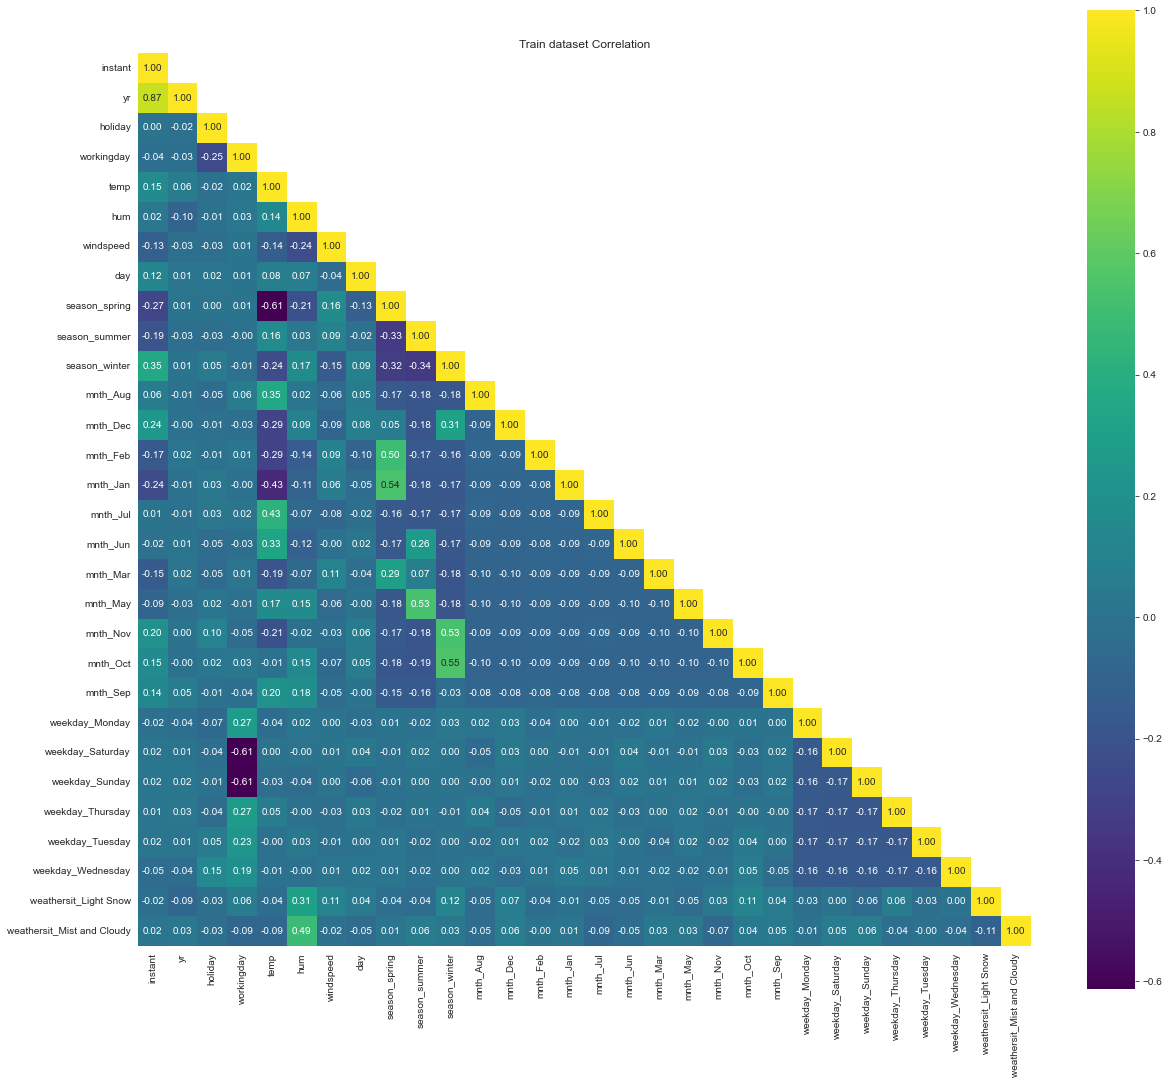

In [144]:
#Check the Correlation of train dataset

plt.figure(figsize=(20,18))
plt.title('Train dataset Correlation')
corr= X_train.corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr, mask=mask,cmap = "viridis",square=True,annot=True,fmt=".2f")
plt.show()


In [145]:
#Create a LinearRegression Object and fit the train set to it.

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [146]:
#Getting Coefficients from regression

coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])
coeff

,Coefficients
instant,-3037.427255
yr,3585.611753
holiday,-154.734744
workingday,-277.386422
temp,873.543319
hum,-245.736471
windspeed,-234.974201
day,59.322888
season_spring,-354.336351
season_summer,19.850736


In [147]:
regressor.intercept_

4492.518835616437

In [148]:
#Find the y-predicted value
y_pred = regressor.predict(X_test)

In [149]:
df_linear_val = pd.DataFrame({
    'Actual':y_test,
    'Predicted': y_pred
})

In [150]:
df_linear_val

,Actual,Predicted
196,5923,4036.039284
187,4592,4758.115009
14,1248,1128.246158
31,1360,1152.378748
390,4075,3599.005905
...,...,...
118,4595,4294.782426
566,4459,3600.110916
688,5634,5061.259062
266,5423,4763.238871


## R2 Score Verification (sklearn model)

In [151]:
r2_score(y_test, y_pred)

0.8693237333671379

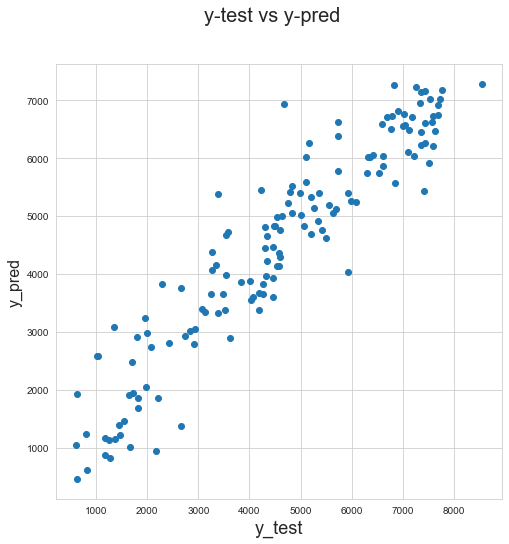

In [152]:
#Scatter plot for ytest and y-predict
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred)
plt.suptitle('y-test vs y-pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          
plt.show()

In [153]:
#Residual Anaysis of train data

y_train_cnt = regressor.predict(X_train)

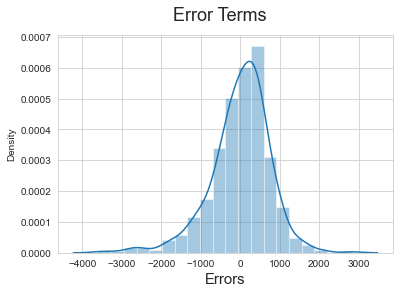

In [154]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 18)                  
# Plot heading 
plt.xlabel('Errors', fontsize = 15)  
plt.show()

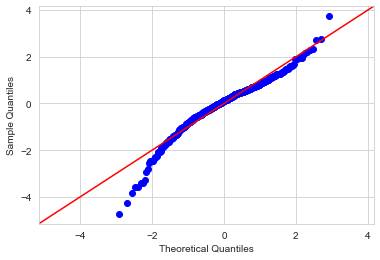

In [155]:
sm.qqplot((y_train - y_train_cnt), fit=True, line='45')
plt.show()

# Building linear model using statsmodel, for the detailed statistics


## Step 1: Preparing Train and Test DataSet

In [156]:
#Creating new set of train and test data
df_train, df_test = train_test_split(bikeval, train_size = 0.7, test_size = 0.3, random_state = 100)

In [157]:
num_cols = list(df_train.describe().columns)
num_cols

['instant',
 'yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'cnt',
 'day',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_Aug',
 'mnth_Dec',
 'mnth_Feb',
 'mnth_Jan',
 'mnth_Jul',
 'mnth_Jun',
 'mnth_Mar',
 'mnth_May',
 'mnth_Nov',
 'mnth_Oct',
 'mnth_Sep',
 'weekday_Monday',
 'weekday_Saturday',
 'weekday_Sunday',
 'weekday_Thursday',
 'weekday_Tuesday',
 'weekday_Wednesday',
 'weathersit_Light Snow',
 'weathersit_Mist and Cloudy']

In [158]:
#Using standard scaling for fields
sc_new = StandardScaler()
df_train[num_cols] = sc_new.fit_transform(df_train[num_cols])
df_test[num_cols] = sc_new.transform(df_test[num_cols])

In [159]:
df_test

,instant,yr,holiday,workingday,temp,hum,windspeed,cnt,day,season_spring,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist and Cloudy
184,-0.877319,-1.015811,6.183104,-1.571429,1.305371,0.047995,-1.394498,0.798166,-0.979311,-0.566783,...,-0.307279,-0.295669,-0.428129,-0.385550,-0.398862,-0.408715,-0.424918,2.528103,-0.174078,1.383577
535,0.796798,0.984435,-0.161731,0.636364,1.613721,-0.276087,-0.984730,0.884309,0.492319,-0.566783,...,-0.307279,-0.295669,-0.428129,-0.385550,-0.398862,2.446692,-0.424918,-0.395554,-0.174078,-0.722764
299,-0.328819,-1.015811,-0.161731,-1.571429,-0.112129,1.285378,0.079219,-0.937002,1.284735,-0.566783,...,3.254368,-0.295669,-0.428129,2.593699,-0.398862,-0.408715,-0.424918,-0.395554,-0.174078,1.383577
221,-0.700845,-1.015811,-0.161731,0.636364,1.526280,-1.463381,0.110839,0.150554,-0.866108,-0.566783,...,-0.307279,-0.295669,-0.428129,-0.385550,-0.398862,-0.408715,-0.424918,-0.395554,-0.174078,-0.722764
152,-1.029945,-1.015811,-0.161731,-1.571429,1.240938,-2.305983,1.277165,0.246953,-1.092513,-0.566783,...,-0.307279,-0.295669,-0.428129,2.593699,-0.398862,-0.408715,-0.424918,-0.395554,-0.174078,-0.722764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,0.152907,0.984435,-0.161731,0.636364,-1.239685,0.401533,-0.196644,-0.789328,-1.545322,1.764342,...,-0.307279,-0.295669,-0.428129,-0.385550,-0.398862,-0.408715,2.353394,-0.395554,-0.174078,1.383577
702,1.593315,0.984435,-0.161731,0.636364,-0.079915,0.725607,-0.220305,1.086847,-0.413299,-0.566783,...,-0.307279,-0.295669,-0.428129,-0.385550,-0.398862,-0.408715,-0.424918,2.528103,-0.174078,-0.722764
127,-1.149184,-1.015811,-0.161731,0.636364,0.210028,0.003802,-1.481206,-0.078648,-1.205715,-0.566783,...,-0.307279,-0.295669,-0.428129,-0.385550,-0.398862,-0.408715,2.353394,-0.395554,-0.174078,-0.722764
640,1.297602,0.984435,-0.161731,0.636364,0.923381,1.149853,-1.583756,1.582170,-0.639704,-0.566783,...,3.254368,-0.295669,-0.428129,-0.385550,-0.398862,2.446692,-0.424918,-0.395554,-0.174078,1.383577


In [160]:
y_train_new = df_train.pop('cnt')
X_train_new = df_train

In [161]:
X_train_new

,instant,yr,holiday,workingday,temp,hum,windspeed,day,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow,weathersit_Mist and Cloudy
653,1.359606,0.984435,-0.161731,0.636364,-0.121335,-0.514725,-0.117752,0.039510,-0.566783,-0.569803,...,3.254368,-0.295669,-0.428129,-0.38555,-0.398862,-0.408715,-0.424918,2.528103,-0.174078,-0.722764
576,0.992350,0.984435,-0.161731,0.636364,1.231731,0.516433,-0.330615,1.737544,-0.566783,-0.569803,...,-0.307279,-0.295669,-0.428129,-0.38555,-0.398862,-0.408715,-0.424918,2.528103,-0.174078,-0.722764
426,0.276915,0.984435,-0.161731,-1.571429,-0.420478,-0.069854,-0.385694,-1.432120,1.764342,-0.569803,...,-0.307279,-0.295669,-0.428129,-0.38555,2.507133,-0.408715,-0.424918,-0.395554,-0.174078,1.383577
728,1.717324,0.984435,-0.161731,0.636364,-1.294913,-1.045032,2.018143,1.624342,1.764342,-0.569803,...,-0.307279,-0.295669,2.335743,-0.38555,-0.398862,-0.408715,-0.424918,-0.395554,-0.174078,-0.722764
482,0.544011,0.984435,-0.161731,-1.571429,-0.627580,-1.000840,-0.779889,1.397937,-0.566783,1.754993,...,-0.307279,-0.295669,-0.428129,-0.38555,2.507133,-0.408715,-0.424918,-0.395554,-0.174078,1.383577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.753872,0.984435,-0.161731,0.636364,1.273152,-0.305544,0.205320,-1.092513,-0.566783,1.754993,...,-0.307279,-0.295669,-0.428129,-0.38555,-0.398862,-0.408715,2.353394,-0.395554,-0.174078,1.383577
578,1.001889,0.984435,-0.161731,0.636364,1.448040,0.201190,-0.787759,-0.866108,-0.566783,-0.569803,...,-0.307279,-0.295669,-0.428129,-0.38555,-0.398862,-0.408715,-0.424918,-0.395554,-0.174078,-0.722764
53,-1.502132,-1.015811,-0.161731,0.636364,-1.483204,-1.471329,-1.234384,0.831926,1.764342,-0.569803,...,-0.307279,-0.295669,-0.428129,-0.38555,-0.398862,-0.408715,-0.424918,-0.395554,-0.174078,-0.722764
350,-0.085572,-1.015811,-0.161731,0.636364,-1.281106,-0.497048,0.654645,0.152712,-0.566783,-0.569803,...,-0.307279,-0.295669,2.335743,-0.38555,-0.398862,-0.408715,-0.424918,-0.395554,-0.174078,1.383577


## Step 2 : RFE Recursive Feature Elimination
#### Use RFQ to check the important fields

In [162]:
lm = LinearRegression()
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train_new, y_train_new)

In [163]:
#Print RFE 

list(zip(X_train_new.columns, rfe.support_, rfe.ranking_))

[('instant', False, 9),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('day', False, 13),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 16),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 7),
 ('weekday_Saturday', False, 3),
 ('weekday_Sunday', False, 4),
 ('weekday_Thursday', False, 15),
 ('weekday_Tuesday', False, 6),
 ('weekday_Wednesday', False, 10),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist and Cloudy', True, 1)]

In [164]:
cols = X_train_new.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Light Snow',
       'weathersit_Mist and Cloudy'],
      dtype='object')

In [165]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   instant                     510 non-null    float64
 1   yr                          510 non-null    float64
 2   holiday                     510 non-null    float64
 3   workingday                  510 non-null    float64
 4   temp                        510 non-null    float64
 5   hum                         510 non-null    float64
 6   windspeed                   510 non-null    float64
 7   day                         510 non-null    float64
 8   season_spring               510 non-null    float64
 9   season_summer               510 non-null    float64
 10  season_winter               510 non-null    float64
 11  mnth_Aug                    510 non-null    float64
 12  mnth_Dec                    510 non-null    float64
 13  mnth_Feb                    510 no

## Step 3: Model Bulding

### Model 1 :

In [166]:
# Creating X_test dataframe with RFE selected variables
X_train_model1 = X_train_new[cols]

In [167]:
#Adding constant variable
X_train_model1 = sm.add_constant(X_train_model1)

In [168]:
#Running Statsmodel Linear Model
lm_statsmodel1 = sm.OLS(y_train_new,X_train_model1).fit()

In [169]:
#Print Summary
print(lm_statsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.34e-189
Time:                        14:08:35   Log-Likelihood:                -247.45
No. Observations:                 510   AIC:                             526.9
Df Residuals:                     494   BIC:                             594.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

 ##### R-squared value for this model is 0.845

### Checking VIF of model

In [170]:
#Calcualte the VIF of Model1
vif = pd.DataFrame()
X = X_train_model1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,season_spring,5.27
3,temp,4.42
8,season_winter,3.83
7,season_summer,2.76
4,hum,1.93
12,mnth_Nov,1.76
10,mnth_Jan,1.68
15,weathersit_Mist and Cloudy,1.57
9,mnth_Dec,1.49
11,mnth_Jul,1.49


In [171]:
#Droping one column and checking model

X_train_new = X_train_model1.drop(["season_spring"], axis = 1)

### Model 2 :

In [172]:
#Adding constant variable
X_train_model2 = sm.add_constant(X_train_new)

In [173]:
#Running Statsmodel Linear Model
lm_statsmodel2 = sm.OLS(y_train_new,X_train_model2).fit()

In [174]:
#Print Summary
print(lm_statsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.54e-188
Time:                        14:08:36   Log-Likelihood:                -251.77
No. Observations:                 510   AIC:                             533.5
Df Residuals:                     495   BIC:                             597.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

##### R-squared value is 0.812 and P-value is zero 

### Checking VIF of model

In [175]:
#Calcualte the VIF of model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,2.32
7,season_winter,2.08
4,hum,1.90
11,mnth_Nov,1.70
9,mnth_Jan,1.67
14,weathersit_Mist and Cloudy,1.55
8,mnth_Dec,1.47
6,season_summer,1.44
10,mnth_Jul,1.43
13,weathersit_Light Snow,1.25


##### All Features has VIF< 10 value and there is no Multicollinearity present as well.

## Step 4 : Residual Analysis of the train data

In [176]:
y_train_cnt1 = lm_statsmodel2.predict(X_train_model2)

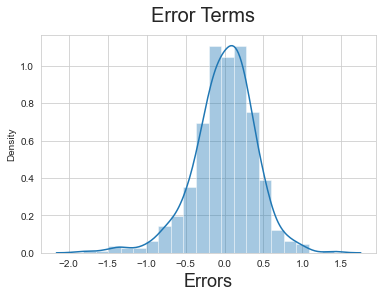

In [177]:
fig = plt.figure()
sns.distplot((y_train_new - y_train_cnt1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

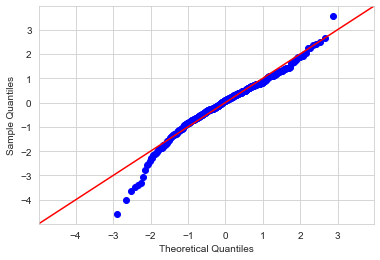

In [178]:
sm.qqplot((y_train_new - y_train_cnt1), fit=True, line='45')
plt.show()

## Step 5 : Making Predictions

In [179]:
y_test_new = df_test.pop('cnt')
X_test_new = df_test

In [180]:
X_test_new.columns

Index(['instant', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'day', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light Snow',
       'weathersit_Mist and Cloudy'],
      dtype='object')

In [181]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Light Snow', 'weathersit_Mist and Cloudy'],
      dtype='object')

In [182]:
# Use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Light Snow', 'weathersit_Mist and Cloudy']
X_test_result = X_test_new[cols]

# Adding a constant variable 
X_test_result = sm.add_constant(X_test_result)

In [183]:
# Making predictions
y_pred = lm_statsmodel2.predict(X_test_result)

In [184]:
y_pred.head()

184   -0.532425
535    1.814882
299   -0.437231
221    0.396364
152    0.477245
dtype: float64

## Step 6:  Model Evaluation

Text(0, 0.5, 'y_pred')

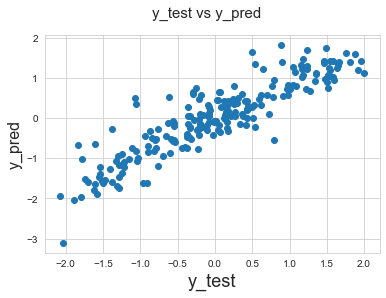

In [185]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test_new,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=15)             
# Plot heading 
plt.xlabel('y_test', fontsize=18)                          
# X-label
plt.ylabel('y_pred', fontsize=16)                          
# Y-label

## R2 Score Verification (stats model)

In [186]:
r2_score(y_test_new, y_pred)

0.8086015607554499

## Coeffiecent of model

In [187]:
ress = pd.DataFrame(lm_statsmodel2.params)
ress.columns=['Coef']
ress.round(3)

,Coef
const,-0.000
yr,0.510
holiday,-0.067
temp,0.557
hum,-0.112
windspeed,-0.149
season_summer,0.137
season_winter,0.267
mnth_Dec,-0.039
mnth_Jan,-0.060


### Conclusions

1. Postiive coefficients like year,temp,season_summer,season_winter and mnth_Sep indicative that increase in these fields contribute to increase in value count.

2. Negative coefficients indicative that increase in these values will cause decrease in value of count.

3. temp,season_winter,season_summer has large coefficients and indicative the importance of climate.
